> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project:  TMDB Movie Data


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction

### Dataset Description 

I want to investigate which genres is the most popolar among the 10,000 movies that are contained in my data set and also which genres has the highest amount of revenue. I have column names genre, adjusted revenue and adjusted budget which will help me in my analysis.
### Question(s) for Analysis
><br><ul>Question 1: Which genre is the most popular </ul> </br>
><br><ul>Question 2: Which genre has the highest amount of revenue.</ul> </br>

In [1]:
#import all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 1.5MB/s eta 0:00:01   16% |█████▎                          | 1.7MB 8.1MB/s eta 0:00:02    23% |███████▋                        | 2.5MB 22.4MB/s eta 0:00:01    30% |█████████▋                      | 3.1MB 29.7MB/s eta 0:00:01    36% |███████████▉                    | 3.9MB 15.3MB/s eta 0:00:01    55% |█████████████████▊              | 5.8MB 15.4MB/s eta 0:00:01    66% |█████████████████████▍          | 7.0MB 14.3MB/s eta 0:00:01    73% |███████████████████████▌        | 7.7MB 28.2MB/s eta 0:00:01    79% |█████████████████████████▌      | 8.3MB 28.3MB/s eta 0:00:01    91% |█████████████████████████████▎  | 9.6MB 15.2MB/s eta 0:00:01    97% |███████████████████████████████ | 10.1MB 23.8MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.3MB/s eta 0:00:01 0% |▎                               | 102kB 13.9MB/s eta 0:00:01    15% |█████                           | 2.1MB 13.2MB/s eta 0:00:01    33% |██████████▉                

<a id='wrangling'></a>
## Data Wrangling
><ul> I will upload my dataset,open and read it.</ul>
> <ul>I will also check for cleanliness by assessing my data.</ul>



### General Properties


In [3]:
#upload data
df=pd.read_csv('tmdb-movies.csv')
df.head()
df.tail(10)
df.shape

(10866, 21)

In [4]:

### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

SyntaxError: invalid syntax (<ipython-input-4-f0b765c442df>, line 3)

In [5]:
df.head(5)

TypeError: __init__() got an unexpected keyword argument 'max_rows'

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

In [6]:
#shape of the dataframe
df.shape


(10866, 21)

We have 10,866 rows and 21 columns

In [7]:
#structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Some rows have got null values which needs to be acted upon before doing analysis

In [8]:
# know the the number of null values in each row
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
#column name
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [10]:
#data cleaning
# removing columns name that we do not need in our analysis
df.drop(['id', 'imdb_id',
       'cast', 'homepage', 'tagline', 'keywords', 'overview',
         'production_companies', 'release_date','budget', 'revenue','vote_count', 'director','original_title'
        
      ],axis=1,inplace=True)
      

In [11]:
# our new columns
df.head()
df.columns

Index(['popularity', 'runtime', 'genres', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

In [12]:
#new shape
df.shape

(10866, 7)

We have 7 columns which are required for analysis

In [13]:
#access duplicate
sum(df.duplicated())

1

In [14]:
#duplicate row
df[df.duplicated()]

TypeError: __init__() got an unexpected keyword argument 'max_rows'

      popularity  runtime                                       genres  \
2090     0.59643       92  Crime|Drama|Action|Thriller|Science Fiction   

      vote_average  release_year  budget_adj  revenue_adj  
2090           5.0          2010  30000000.0     967000.0  

In [15]:
#remove the duplicates
df.drop_duplicates(inplace=True)

In [16]:
#check whether the duplicate row is removed
sum(df.duplicated())

0

In [17]:
#check for null rows
df.isnull().sum()

popularity       0
runtime          0
genres          23
vote_average     0
release_year     0
budget_adj       0
revenue_adj      0
dtype: int64

In [18]:
#remove nulls
df.dropna(inplace=True)

In [19]:
#check nulls again
df.isnull().sum()

popularity      0
runtime         0
genres          0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

In [20]:
#access if the dataset has zero values in it
df.eq(0).any().any()

True

In [21]:
#if nonzero return true else false
#remove rows with zero values
#check if rows are removed
df != 0
df = df[(df != 0).all(1)]
df.eq(0).any().any()

False

In [22]:
#new shape
df.shape

(3854, 7)

In [23]:
#spli genre and give it a new name
A = df.join(df.genres.str.strip('|').str.split('|',expand=True).stack().reset_index(level=1,drop=True).rename('genre')).reset_index(drop=True)
A.head(5)


TypeError: __init__() got an unexpected keyword argument 'max_rows'

   popularity  runtime                                     genres  \
0   32.985763      124  Action|Adventure|Science Fiction|Thriller   
1   32.985763      124  Action|Adventure|Science Fiction|Thriller   
2   32.985763      124  Action|Adventure|Science Fiction|Thriller   
3   32.985763      124  Action|Adventure|Science Fiction|Thriller   
4   28.419936      120  Action|Adventure|Science Fiction|Thriller   

   vote_average  release_year    budget_adj   revenue_adj            genre  
0           6.5          2015  1.379999e+08  1.392446e+09           Action  
1           6.5          2015  1.379999e+08  1.392446e+09        Adventure  
2           6.5          2015  1.379999e+08  1.392446e+09  Science Fiction  
3           6.5          2015  1.379999e+08  1.392446e+09         Thriller  
4           7.1          2015  1.379999e+08  3.481613e+08           Action  

In [24]:
A.describe

<bound method NDFrame.describe of        popularity  runtime                                          genres  \
0       32.985763      124       Action|Adventure|Science Fiction|Thriller   
1       32.985763      124       Action|Adventure|Science Fiction|Thriller   
2       32.985763      124       Action|Adventure|Science Fiction|Thriller   
3       32.985763      124       Action|Adventure|Science Fiction|Thriller   
4       28.419936      120       Action|Adventure|Science Fiction|Thriller   
5       28.419936      120       Action|Adventure|Science Fiction|Thriller   
6       28.419936      120       Action|Adventure|Science Fiction|Thriller   
7       28.419936      120       Action|Adventure|Science Fiction|Thriller   
8       13.112507      119              Adventure|Science Fiction|Thriller   
9       13.112507      119              Adventure|Science Fiction|Thriller   
10      13.112507      119              Adventure|Science Fiction|Thriller   
11      11.173104      136    


## Exploratory Data Analysis



### Research Question 1 : Which is the most popular genre?

In [25]:
#adjusted means
mean_genre_budget = A.groupby('genre').budget_adj.mean()


mean_genre_popularity = A.groupby('genre').popularity.mean()


mean_genre_runtime = A.groupby('genre').runtime.mean()


mean_genre_release_year = A.groupby('genre').release_year.mean()


mean_genre_vote = A.groupby('genre').vote_average.mean()


mean_genre_revenue = A.groupby('genre').revenue_adj.mean()


In [26]:
A.columns

Index(['popularity', 'runtime', 'genres', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj', 'genre'],
      dtype='object')

In [27]:
#concatenate all genres together
mean_genre_data = pd.concat([ mean_genre_budget,mean_genre_popularity, mean_genre_revenue, mean_genre_runtime, mean_genre_release_year, mean_genre_vote],axis=1)
mean_genre_data

TypeError: __init__() got an unexpected keyword argument 'max_rows'

                   budget_adj  popularity   revenue_adj     runtime  \
genre                                                                 
Action           6.644262e+07    1.567116  1.953879e+08  111.663594   
Adventure        8.125573e+07    1.867693  2.714075e+08  112.615487   
Animation        8.347215e+07    1.710622  2.909574e+08   89.228856   
Comedy           3.917646e+07    1.012321  1.213085e+08  101.650957   
Crime            3.991007e+07    1.123961  1.103951e+08  111.552995   
Documentary      5.379702e+06    0.294458  2.480617e+07  101.428571   
Drama            3.471246e+07    1.001411  1.013785e+08  115.906036   
Family           7.110099e+07    1.459043  2.437910e+08   98.665882   
Fantasy          8.023752e+07    1.754315  2.499928e+08  107.608586   
Foreign          1.289824e+07    0.179608  1.273378e+07  123.153846   
History          5.687985e+07    0.970674  1.216617e+08  142.286822   
Horror           2.324071e+07    0.854005  8.140656e+07   99.144708   
Music 

In [28]:
#make genre as columns
A_mean = mean_genre_data.reset_index()
A_mean

TypeError: __init__() got an unexpected keyword argument 'max_rows'

              genre    budget_adj  popularity   revenue_adj     runtime  \
0            Action  6.644262e+07    1.567116  1.953879e+08  111.663594   
1         Adventure  8.125573e+07    1.867693  2.714075e+08  112.615487   
2         Animation  8.347215e+07    1.710622  2.909574e+08   89.228856   
3            Comedy  3.917646e+07    1.012321  1.213085e+08  101.650957   
4             Crime  3.991007e+07    1.123961  1.103951e+08  111.552995   
5       Documentary  5.379702e+06    0.294458  2.480617e+07  101.428571   
6             Drama  3.471246e+07    1.001411  1.013785e+08  115.906036   
7            Family  7.110099e+07    1.459043  2.437910e+08   98.665882   
8           Fantasy  8.023752e+07    1.754315  2.499928e+08  107.608586   
9           Foreign  1.289824e+07    0.179608  1.273378e+07  123.153846   
10          History  5.687985e+07    0.970674  1.216617e+08  142.286822   
11           Horror  2.324071e+07    0.854005  8.140656e+07   99.144708   
12            Music  3.51

Text(0,0.5,'Frequency of Occurence')

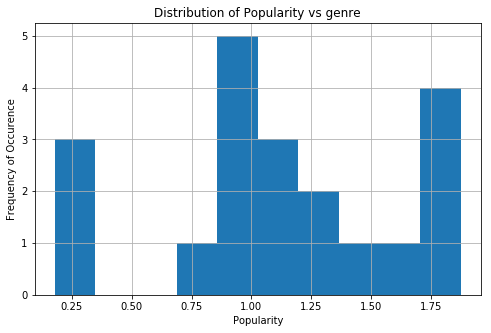

In [29]:
#most popular genre
mean_genre_data["popularity"].hist(figsize=(8,5));
plt.title('Distribution of Popularity vs genre')
plt.xlabel('Popularity')
plt.ylabel('Frequency of Occurence')

We can see that most popular genre lies between 0.9 to 1.25 based on the score given

In [30]:
mean_genre_data.sort_values('popularity', ascending=False).popularity

genre
Science Fiction    1.873294
Adventure          1.867693
Fantasy            1.754315
Animation          1.710622
Action             1.567116
Family             1.459043
Thriller           1.258950
War                1.246129
Mystery            1.142613
Western            1.134246
Crime              1.123961
Comedy             1.012321
Drama              1.001411
History            0.970674
Romance            0.954889
Music              0.899005
Horror             0.854005
Documentary        0.294458
TV Movie           0.273628
Foreign            0.179608
Name: popularity, dtype: float64

Science Fiction is the most popular with a mean of 1.873294  and Foreign is the least popular with a mean of 0.179608

Text(0,0.5,'popularity')

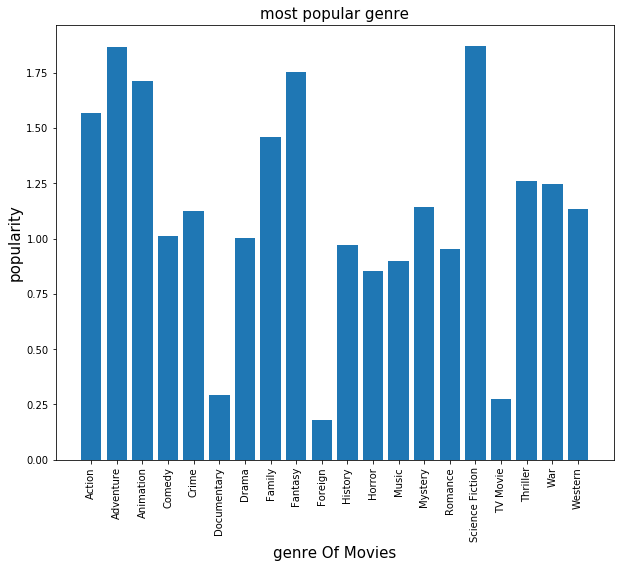

In [32]:
#bar graph
x=A_mean["genre"]
y=A_mean["popularity"]
fig,ax = plt.subplots(figsize=(10,8))
ax.bar(x, y)
plt.xticks(rotation=90)
plt.title("most popular genre",fontsize=15)
plt.xlabel('genre Of Movies',fontsize=15)
plt.ylabel("popularity",fontsize= 15)

Bar graph confirms Science Fiction as the most popular movie

# Let me use a function to confirm the most popular movie genre

In [58]:
#Creating Function for Barh Plot
def Barplot(data_name,plot_title,x_label,y_label):
    data_name.plot(kind = 'barh',figsize = (10,6))
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    

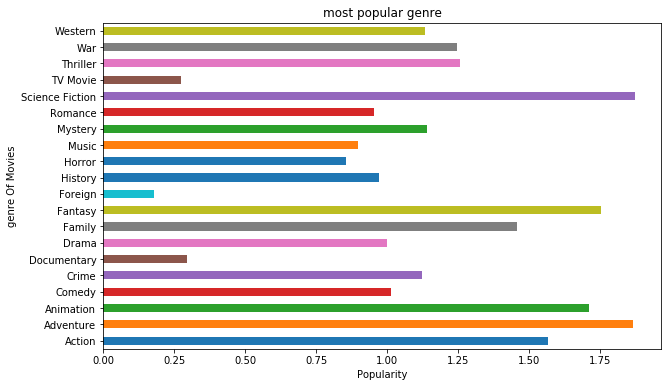

In [60]:
Barplot(mean_genre_popularity,'most popular genre','Popularity','genre Of Movies')

By use of this function, Science Fiction is the most popular movie genre. I can be able to reuse this function later on in my code.

### Research Question 2 : Movie with the highest budget

Text(0,0.5,'budget')

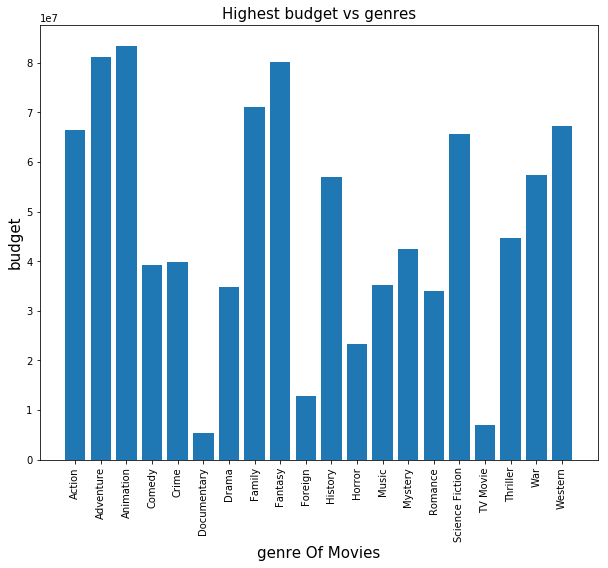

In [61]:
#movie vs budget
x=A_mean["genre"]
y=A_mean["budget_adj"]
fig,ax = plt.subplots(figsize=(10,8))
ax.bar(x, y)
plt.xticks(rotation=90)
plt.title("Highest budget vs genres",fontsize=15)
plt.xlabel('genre Of Movies',fontsize=15)
plt.ylabel("budget",fontsize= 15)


Animation has the highest budget while Documentary has the least budget

# Let me reuse my function to confirm Animation has the highest budget

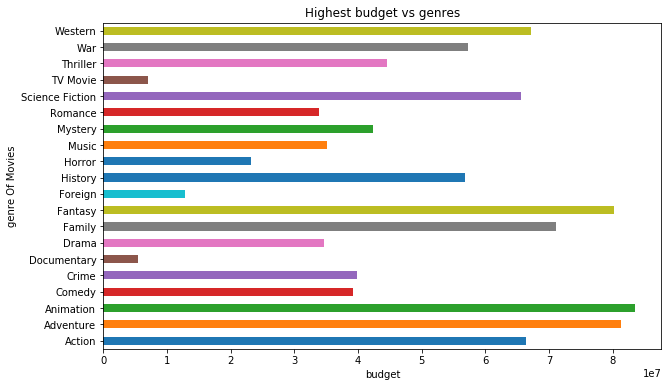

In [64]:
Barplot(mean_genre_budget,'Highest budget vs genres','budget','genre Of Movies')

Indeed Animation has the highest budget .

<a id='conclusions'></a>
## Conclusions

>Science Fiction is the most popular movie genre while Foreigh is the least popular

> Animation has the highest budget while Documentary has the least budget


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [62]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

# Limitation


During the data cleaning process, I split the data seperated by '|' into lists for easy parsing during the exploration phase. This increases the time taken in calculating the result.
